<h3><center> International e-workshop on Machine learning applications in drug discovery: basic to advanced<br><font color='green'>Author: Kalyani Dhusia <br> Dated: 05.21.2021</font> </center></h3>

##### <font color='maroon'>Module 2: Introduction to machine learning (Lecture cum Hands-on session)<br><br>  • Protein data handeling using Jupyter(Python)<br> </font>
 




In [1]:
#Let's first call for basic python fuctions(modules) to work with jupyter
import pandas as pd
import numpy as np
import sys
import gzip
from biopandas.pdb import PandasPdb

In [2]:
# Initialize a new PandasPdb object
# and fetch the PDB file from rcsb.org
ppdb = PandasPdb().fetch_pdb('7df4')

<br>Alternatively, we can load PDB files from local directories as regular PDB files using read_pdb

Or, we can load them from gzip archives like so (note that the file must end with a '.gz' suffix in order to be recognized as a gzip file):

In [3]:
ppdb.read_pdb('/Users/saheeba/Downloads/MLADDBA/data/7df4.pdb')
ppdb.read_pdb('/Users/saheeba/Downloads/MLADDBA/data/7df4.pdb.gz')

After the file was succesfully loaded, we have access to the following attributes:

In [4]:
print('PDB Code: %s' % ppdb.code)
print('PDB Header Line: %s' % ppdb.header)
print('\nRaw PDB file contents:\n\n%s\n...' % ppdb.pdb_text[:1000])

PDB Code: 7df4
PDB Header Line:     VIRAL PROTEIN                           06-NOV-20   7DF4

Raw PDB file contents:

HEADER    VIRAL PROTEIN                           06-NOV-20   7DF4              
TITLE     SARS-COV-2 S-ACE2 COMPLEX                                             
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: ANGIOTENSIN-CONVERTING ENZYME 2;                           
COMPND   3 CHAIN: A;                                                            
COMPND   4 SYNONYM: ANGIOTENSIN-CONVERTING ENZYME HOMOLOG,ACEH,ANGIOTENSIN-     
COMPND   5 CONVERTING ENZYME-RELATED CARBOXYPEPTIDASE,ACE-RELATED               
COMPND   6 CARBOXYPEPTIDASE,METALLOPROTEASE MPROT15;                            
COMPND   7 EC: 3.4.17.23,3.4.17.-;                                              
COMPND   8 ENGINEERED: YES;                                                     
COMPND   9 MOL_ID: 2;                                                   

##### <font color='brown'>The most interesting useful attribute is the PandasPdb.df DataFrame dictionary though, which gives us access to the PDB files as pandas DataFrames. Let's print the first 3 lines from the ATOM coordinate section to see how it looks like:</font>

In [5]:
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,19,,...,185.293,188.581,285.962,1.0,140.94,,,N,NaN,1893
1,ATOM,2,,CA,,SER,,A,19,,...,186.331,187.885,286.712,1.0,140.94,,,C,NaN,1894
2,ATOM,3,,C,,SER,,A,19,,...,186.651,188.619,288.010,1.0,140.94,,,C,NaN,1895
3,ATOM,4,,O,,SER,,A,19,,...,186.284,188.169,289.095,1.0,140.94,,,O,NaN,1896
4,ATOM,5,,CB,,SER,,A,19,,...,187.597,187.735,285.865,1.0,140.20,,,C,NaN,1897


In [6]:
ppdb.df.keys()

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

In [7]:
ppdb.df['HETATM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,29917,,C1,,NAG,,E,1,,...,215.900,180.146,131.480,1.0,30.0,,,C,NaN,31809
1,HETATM,29918,,C2,,NAG,,E,1,,...,216.579,179.615,132.737,1.0,30.0,,,C,NaN,31810
2,HETATM,29919,,C3,,NAG,,E,1,,...,218.056,179.383,132.455,1.0,30.0,,,C,NaN,31811
3,HETATM,29920,,C4,,NAG,,E,1,,...,218.213,178.429,131.280,1.0,30.0,,,C,NaN,31812
4,HETATM,29921,,C5,,NAG,,E,1,,...,217.484,178.991,130.061,1.0,30.0,,,C,NaN,31813


In [8]:
ppdb.df['ANISOU'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,"U(1,1)","U(2,2)","U(3,3)","U(1,2)","U(1,3)","U(2,3)",blank_4,element_symbol,charge,line_idx


Since the DataFrames are fairly wide, let's us take a look at the columns by accessing the DataFrame's column attribute:

In [9]:
ppdb.df['ANISOU'].columns

Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc',
       'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion',
       'blank_3', 'U(1,1)', 'U(2,2)', 'U(3,3)', 'U(1,2)', 'U(1,3)', 'U(2,3)',
       'blank_4', 'element_symbol', 'charge', 'line_idx'],
      dtype='object')

<br>

##### <font color='brown'> ANISOU records are very similar to ATOM/HETATM records. In fact, the columns 7 - 27 and 73 - 80 are identical to their corresponding ATOM/HETATM records,<br> which means that the 'ANISOU' DataFrame doesn't have the following entries:

In [10]:
set(ppdb.df['ATOM'].columns).difference(set(ppdb.df['ANISOU'].columns))

{'b_factor', 'occupancy', 'segment_id', 'x_coord', 'y_coord', 'z_coord'}

<br>

##### <font color='brown'>Ah, another interesting thing to mention is that the columns already come with the types you'd expect (where object essentially "means" str here):</font>

In [11]:
ppdb.df['ATOM'].dtypes

record_name        object
atom_number         int64
blank_1            object
atom_name          object
alt_loc            object
residue_name       object
blank_2            object
chain_id           object
residue_number      int64
insertion          object
blank_3            object
x_coord           float64
y_coord           float64
z_coord           float64
occupancy         float64
b_factor          float64
blank_4            object
segment_id         object
element_symbol     object
charge            float64
line_idx            int64
dtype: object

In [12]:
ppdb.df['OTHERS'].head()

,record_name,entry,line_idx
0,HEADER,VIRAL PROTEIN 06...,0
1,TITLE,SARS-COV-2 S-ACE2 COMPLEX,1
2,COMPND,MOL_ID: 1;,2
3,COMPND,2 MOLECULE: ANGIOTENSIN-CONVERTING ENZYME 2;,3
4,COMPND,3 CHAIN: A;,4


In [13]:
#let's get all Alanine residues:
ppdb.df['ATOM'][ppdb.df['ATOM']['residue_name'] == 'ALA'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
48,ATOM,49,,N,,ALA,,A,25,,...,181.270,193.495,289.393,1.0,141.65,,,N,NaN,1941
49,ATOM,50,,CA,,ALA,,A,25,,...,180.306,194.503,289.820,1.0,141.65,,,C,NaN,1942
50,ATOM,51,,C,,ALA,,A,25,,...,179.869,195.383,288.657,1.0,141.65,,,C,NaN,1943
51,ATOM,52,,O,,ALA,,A,25,,...,178.698,195.770,288.572,1.0,141.65,,,O,NaN,1944
52,ATOM,53,,CB,,ALA,,A,25,,...,180.898,195.352,290.944,1.0,138.73,,,C,NaN,1945


In [14]:
#main chain atoms:
ppdb.df['ATOM'][ppdb.df['ATOM']['atom_name'] == 'C'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
2,ATOM,3,,C,,SER,,A,19,,...,186.651,188.619,288.010,1.0,140.94,,,C,NaN,1895
8,ATOM,9,,C,,THR,,A,20,,...,186.455,191.255,289.610,1.0,140.89,,,C,NaN,1901
15,ATOM,16,,C,,ILE,,A,21,,...,185.058,193.598,290.791,1.0,140.21,,,C,NaN,1908
23,ATOM,24,,C,,GLU,,A,22,,...,184.959,195.066,288.120,1.0,140.10,,,C,NaN,1916
32,ATOM,33,,C,,GLU,,A,23,,...,183.261,192.802,286.676,1.0,141.60,,,C,NaN,1925


In [15]:
#main chain atoms without specific atom
ppdb.df['ATOM'][ppdb.df['ATOM']['element_symbol'] != 'C'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,19,,...,185.293,188.581,285.962,1.0,140.94,,,N,NaN,1893
3,ATOM,4,,O,,SER,,A,19,,...,186.284,188.169,289.095,1.0,140.94,,,O,NaN,1896
5,ATOM,6,,OG,,SER,,A,19,,...,188.627,187.095,286.597,1.0,140.20,,,O,NaN,1898
6,ATOM,7,,N,,THR,,A,20,,...,187.339,189.752,287.889,1.0,140.89,,,N,NaN,1899
9,ATOM,10,,O,,THR,,A,20,,...,185.450,191.446,288.920,1.0,140.89,,,O,NaN,1902


In [16]:
#let's compute the average temperature factor of our protein main chain:
mainchain = ppdb.df['ATOM'][(ppdb.df['ATOM']['atom_name'] == 'C') | 
                            (ppdb.df['ATOM']['atom_name'] == 'O') | 
                            (ppdb.df['ATOM']['atom_name'] == 'N') |
                            (ppdb.df['ATOM']['atom_name'] == 'H') |
                            (ppdb.df['ATOM']['atom_name'] == 'CA')]

bfact_mc_avg = mainchain['b_factor'].mean()
print('Average B-Factor [Main Chain]: %.2f' % bfact_mc_avg)

Average B-Factor [Main Chain]: 120.74


## <font color = "brown"> Visualization using Plots/Graphs

##### <font color = "black"> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.<br> Since we are using pandas, which in turns uses matplotlib under the hood, <br>we can produce quick summary plots of our PDB structures relatively conveniently: </font>

In [17]:
#import modules or can be downloaded from conda at https://anaconda.org/conda-forge/matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')

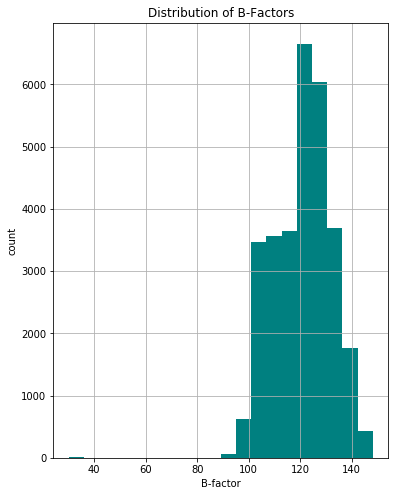

<Figure size 432x288 with 0 Axes>

In [44]:
ppdb.df['ATOM']['b_factor'].plot(kind='hist',figsize=(6,8), color='#008080', bins =20,grid = True, stacked=True)
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()
plt.savefig("./img/b-factor_hist.png") #to save images with required dimensions, name, resolution and side

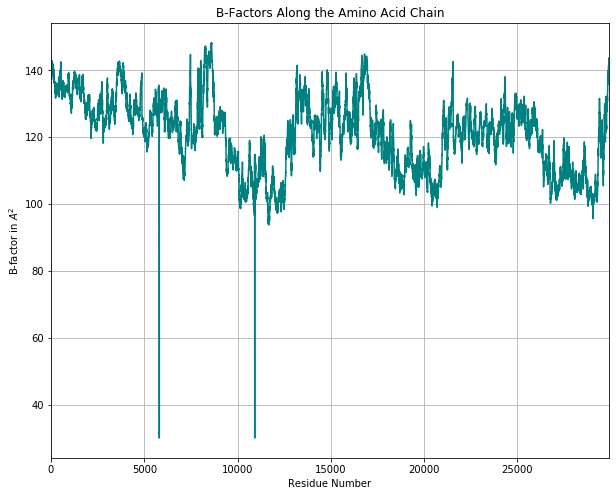

<Figure size 432x288 with 0 Axes>

In [19]:
ppdb.df['ATOM']['b_factor'].plot(kind='line',figsize=(10,8), color='#008080',grid = True)
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()
plt.savefig("./img/b-factor_line.png")

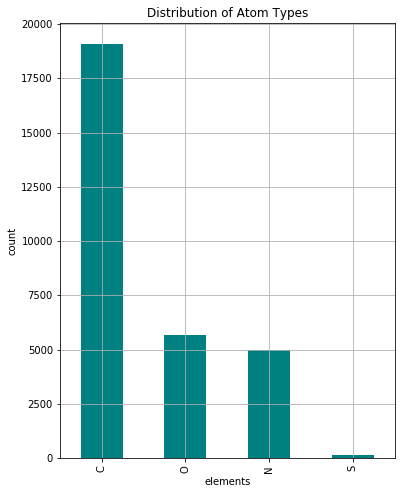

<Figure size 432x288 with 0 Axes>

In [20]:
ppdb.df['ATOM']['element_symbol'].value_counts().plot(kind='bar',figsize=(6,8), color='#008080',grid = True)
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()
plt.savefig("./img/b-factor_count.png")

## <font color = "brown">  Computing the Root Mean Square Deviation</font><br>

##### <font color = "black"> BioPandas also comes with certain convenience functions, for example, ...<br>The Root-mean-square deviation (RMSD) is simply a measure of the average distance between atoms of 2 protein or ligand structures.</font>

In [21]:
from biopandas.pdb import PandasPdb

l_1 = PandasPdb().read_pdb('./data/lig_conf_1.pdb')
l_2 = PandasPdb().read_pdb('./data/lig_conf_2.pdb')
r = PandasPdb.rmsd(l_1.df['HETATM'], l_2.df['HETATM'],s=None) # all atoms, including hydrogens
print('RMSD: %.4f Angstrom' % r)

RMSD: 2.6444 Angstrom


In [22]:
r = PandasPdb.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], s='carbon') # carbon atoms only
print('RMSD: %.4f Angstrom' % r)

RMSD: 3.1405 Angstrom


In [23]:
r = PandasPdb.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], s='heavy') # heavy atoms only
print('RMSD: %.4f Angstrom' % r)

RMSD: 1.9959 Angstrom


<br>

##### <font color = "black">Similarly, we can compute the RMSD between 2 related protein structures:<br>The hydrogen-free RMSD:</font>

In [24]:
p_1 = PandasPdb().read_pdb('./data/1t48_995.pdb')
p_2 = PandasPdb().read_pdb('./data/1t49_995.pdb')
r = PandasPdb.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='heavy')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.7377 Angstrom


## <font color = "brown"> Filtering PDBs by Distance</font>

##### <font color = "black">We can use the distance method to compute the distance between each atom (or a subset of atoms) <br>in our data frame and a three-dimensional reference point. For example:

In [25]:
p_1 = PandasPdb().read_pdb('./data/3eiy.pdb')

reference_point = (9.362, 41.410, 10.542)
distances = p_1.distance(xyz=reference_point, records=('ATOM',))

In [26]:
distances.head()

0    19.267419
1    18.306060
2    16.976934
3    16.902897
4    18.124171
dtype: float64

<br>

##### <font color = "maroon">And we can use this Series object, for instance, to select certain atoms in our DataFrame that fall within a desired distance threshold.<br> For example, let's select all atoms that are within 7A of our reference point:</font>

In [27]:
all_within_7A = p_1.df['ATOM'][distances < 7.0]
all_within_7A.tail()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
786,ATOM,787,,CB,,LEU,,A,106,,...,13.857,39.118,10.784,1.0,25.38,,,C,NaN,1395
787,ATOM,788,,CG,,LEU,,A,106,,...,14.443,38.394,9.564,1.0,27.94,,,C,NaN,1396
788,ATOM,789,,CD1,,LEU,,A,106,,...,13.727,37.094,9.184,1.0,27.95,,,C,NaN,1397
789,ATOM,790,,CD2,,LEU,,A,106,,...,14.567,39.332,8.388,1.0,26.61,,,C,NaN,1398
790,ATOM,791,,N,,VAL,,A,107,,...,14.523,39.257,13.838,1.0,23.51,,,N,NaN,1399


## <font color = "brown">Converting Amino Acid codes from 3- to 1-letter codes </font>

Residues in the residue_name field can be converted into 1-letter amino acid codes, which may be useful for further <br>sequence analysis, for example, pair-wise or multiple sequence alignments. Here we are going to work with <br>Crystal structure of SARS-CoV-2 receptor binding domain in complex with neutralizing antibody COVA2-04

In [28]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().fetch_pdb('7jmo') 
sequence = ppdb.amino3to1()
sequence.head()

,chain_id,residue_name
0,A,N
8,A,L
16,A,C
22,A,P
29,A,F


As shown above, the <font color = "blue">"amino3to1"</font> method returns a DataFrame containing the chain_id <br>and residue_name of the translated 1-letter amino acids. If you like to work with the sequence as a Python list <br>of string characters, you could do the following:

In [29]:
sequence_list = list(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])
sequence_list[-5:] # last 5 residues of chain A

['A', 'T', 'V', 'C', 'G']

In [30]:
#working with the sequence as a string, we can use the join method
''.join(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])

'NLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCG'

<br>
To iterate over the sequences of multi-chain proteins, we can use the <font color="blue">unique</font> method as shown below

In [38]:
for chain_id in sequence['chain_id'].unique():
    print('\nChain ID: %s' % chain_id)
    print(''.join(sequence.loc[sequence['chain_id'] == chain_id, 'residue_name']))
    #print('\n')


Chain ID: A
NLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCG

Chain ID: H
QVQLVETGGGLIQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLEWVSVIYSGGSTFYADSVKGRFTISRDNSKNTLYLQMNSLRAEDTAVYYCARDLERAGGMDVWGQGTMVTVSSASTKGPSVFPLAPSSGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKRVEPKSC

Chain ID: L
EIVMTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPRLLIYGASSRATGIPDRFSGSGSGTDFTLTISRLEPEDFAVYYCQQYGSLYTFGQGTKVDIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGE


<br>


## <font color = "brown">Wrapping it up - Saving PDB structures</font>

In PDB file format, the ATOM record is used to identify proteins or nucleic acid atoms, and the HETATM record is used to identify atoms in small molecules
With the help of jupyter we could easily extract HETATM from these PDB files and save them as _clean.pdb files
let's code about how to get the PDB structures out of the DataFrame format back into .pdb format.


In [40]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().read_pdb('./data/7df4.pdb.gz')
#Let's say we loaded a PDB structure, removed it from it's hydrogens:
ppdb.df['ATOM'] = ppdb.df['ATOM'][ppdb.df['ATOM']['element_symbol'] != 'H']

In [41]:
ppdb.to_pdb(path='./data/7df4_stripped.pdb', 
            records=None, 
            gz=False, 
            append_newline=True)

By default, all records (that is, 'ATOM', 'HETATM', 'OTHERS', 'ANISOU') are written if we set records=None. Alternatively, let's say we want to get rid of the 'HETATM' entries and produce a compressed gzip archive of our PDB structure:

In [42]:
ppdb.to_pdb(path='./data/7df4_clean.pdb.gz', 
            records=['ATOM', 'OTHERS', 'ANISOU'], 
            gz=True, 
            append_newline=True)

<br>


### <font color="brown"><center> ********************************* End of Chapter 1  ********************************* </center> </font>